# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

**Sumber Dataset**:  https://www.kaggle.com/datasets/puanbeningpastika/dataset-pendidikan-sd-indonesia-2023-2024

Dataset "Kelayakan Pendidikan di Indonesia" berisi data agregat mengenai berbagai indikator pendidikan per provinsi dari tahun ke tahun. Indikator ini mencakup angka partisipasi sekolah, angka melek huruf, rasio guru terhadap murid, dan lainnya.

**Tujuan Proyek**:
Tujuan dari proyek ini adalah untuk membangun sebuah model machine learning yang dapat memprediksi Status_Kelayakan pendidikan di suatu provinsi berdasarkan indikator-indikator yang ada. Ini adalah masalah klasifikasi biner.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [24]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from google.colab import drive
pd.set_option('display.max_columns', None)
print("Semua library berhasil di-import!")


Semua library berhasil di-import!


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Eksperimen_SML_Wahyu/kelayakan-pendidikan-indonesia_raw/kelayakan-pendidikan-indonesia.csv'

Mounted at /content/drive


In [3]:
df = pd.read_csv(file_path)
df.head()

,Provinsi,Sekolah,Siswa,Mengulang,Putus Sekolah,Kepala Sekolah dan Guru(<S1),Kepala Sekolah dan Guru(≥ S1),Tenaga Kependidikan(SM),Tenaga Kependidikan(>SM),Rombongan Belajar,Ruang kelas(baik),Ruang kelas(rusak ringan),Ruang kelas(rusak sedang),Ruang kelas(rusak berat),Unnamed: 14
0,Prov. D.K.I. Jakarta,2224,756455,1202,869,1089,38305,6967,1569,27830,23320,3886,717,345,NaN
1,Prov. Jawa Barat,19553,4487262,4778,5675,5007,209252,27487,3353,169704,59592,46006,34432,14397,NaN
2,Prov. Jawa Tengah,18618,2595050,6909,2399,2337,167535,21325,2473,127266,51050,42356,26321,13457,NaN
3,Prov. D.I. Yogyakarta,1846,270610,357,75,326,19771,4536,866,13719,8217,3878,1827,548,NaN
4,Prov. Jawa Timur,18980,2530849,4694,3327,2950,180465,21116,3818,134724,58679,42896,24218,14389,NaN


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1. Melihat informasi dasar tentang dataset

In [4]:
print("Informasi Dasar Dataset:")
df.info()
print("\n" + "="*50 + "\n")

Informasi Dasar Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Provinsi                       39 non-null     object 
 1   Sekolah                        39 non-null     int64  
 2   Siswa                          39 non-null     int64  
 3   Mengulang                      39 non-null     int64  
 4   Putus Sekolah                  39 non-null     int64  
 5   Kepala Sekolah dan Guru(<S1)   39 non-null     int64  
 6   Kepala Sekolah dan Guru(≥ S1)  39 non-null     int64  
 7   Tenaga Kependidikan(SM)        39 non-null     int64  
 8   Tenaga Kependidikan(>SM)       39 non-null     int64  
 9   Rombongan Belajar              39 non-null     int64  
 10  Ruang kelas(baik)              39 non-null     int64  
 11  Ruang kelas(rusak ringan)      39 non-null     int64  
 12  Ruang kelas(rusak sedang)  

## 4.2. Melihat statistik deskriptif untuk kolom numerik

In [5]:
print("Statistik Deskriptif:")
print(df.describe())
print("\n" + "="*50 + "\n")

Statistik Deskriptif:
            Sekolah         Siswa    Mengulang  Putus Sekolah  \
count     39.000000  3.900000e+01    39.000000      39.000000   
mean    3817.487179  6.170439e+05  2840.820513    1155.051282   
std     4862.821186  8.650352e+05  2312.422413    1167.778659   
min      124.000000  1.778900e+04    56.000000      75.000000   
25%      956.500000  1.431760e+05  1257.500000     466.000000   
50%     2347.000000  3.123520e+05  2049.000000     835.000000   
75%     4326.500000  7.098810e+05  4212.000000    1279.500000   
max    19553.000000  4.487262e+06  9801.000000    5675.000000   

       Kepala Sekolah dan Guru(<S1)  Kepala Sekolah dan Guru(≥ S1)  \
count                     39.000000                      39.000000   
mean                    1311.923077                   40251.846154   
std                     1016.534991                   48430.707661   
min                       76.000000                     450.000000   
25%                      593.000000       

## 4.3. Mengecek jumlah nilai yang hilang (missing values) di setiap kolom

In [6]:
print("Jumlah Missing Values per Kolom:")
print(df.isnull().sum())
print("\n" + "="*50 + "\n")

Jumlah Missing Values per Kolom:
Provinsi                          0
Sekolah                           0
Siswa                             0
Mengulang                         0
Putus Sekolah                     0
Kepala Sekolah dan Guru(<S1)      0
Kepala Sekolah dan Guru(≥ S1)     0
Tenaga Kependidikan(SM)           0
Tenaga Kependidikan(>SM)          0
Rombongan Belajar                 0
Ruang kelas(baik)                 0
Ruang kelas(rusak ringan)         0
Ruang kelas(rusak sedang)         0
Ruang kelas(rusak berat)          0
Unnamed: 14                      39
dtype: int64




In [7]:
df = df.drop(columns=['Unnamed: 14'])
df.isnull().sum()

,0
Provinsi,0
Sekolah,0
Siswa,0
Mengulang,0
Putus Sekolah,0
Kepala Sekolah dan Guru(<S1),0
Kepala Sekolah dan Guru(≥ S1),0
Tenaga Kependidikan(SM),0
Tenaga Kependidikan(>SM),0
Rombongan Belajar,0


## 4.4. Visualisasi untuk memahami data

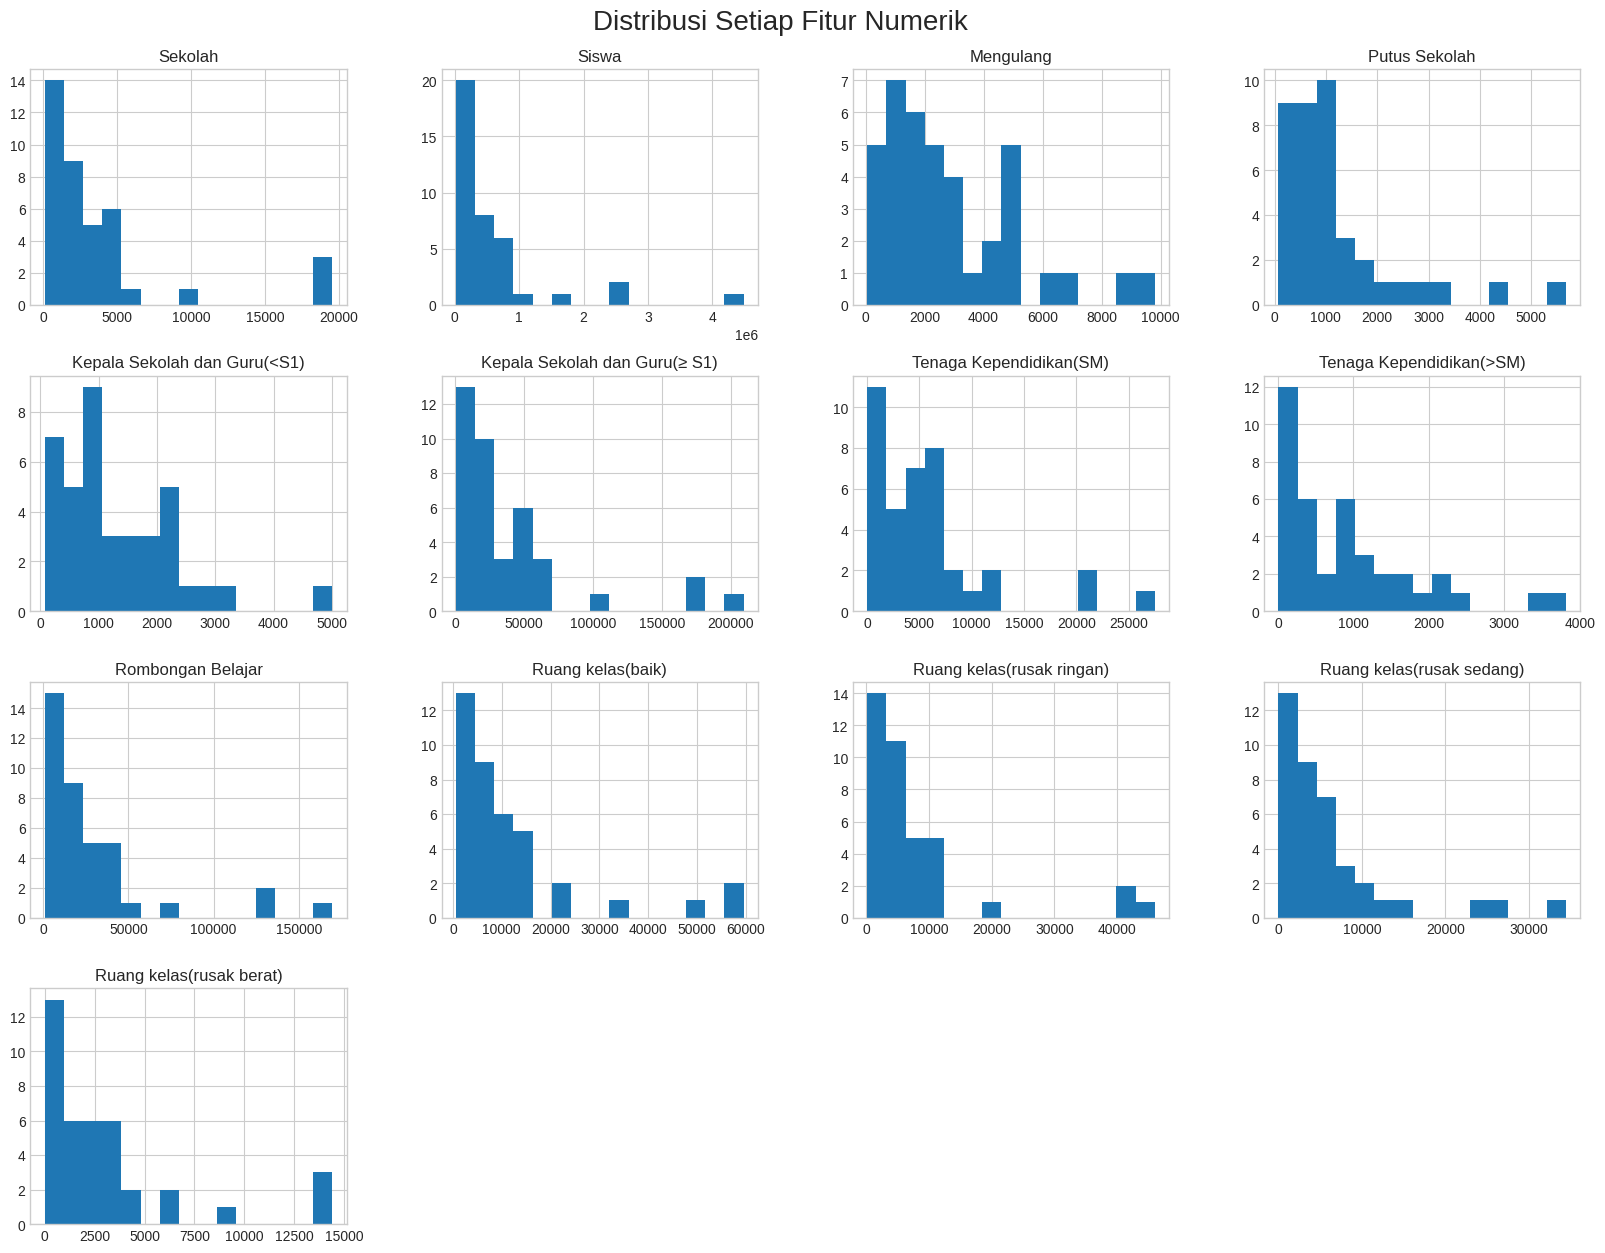

In [15]:
plt.style.use('seaborn-v0_8-whitegrid')
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(figsize=(20, 15), bins=15, xlabelsize=10, ylabelsize=10)
plt.suptitle('Distribusi Setiap Fitur Numerik', x=0.5, y=0.92, ha='center', fontsize=20)
plt.show()

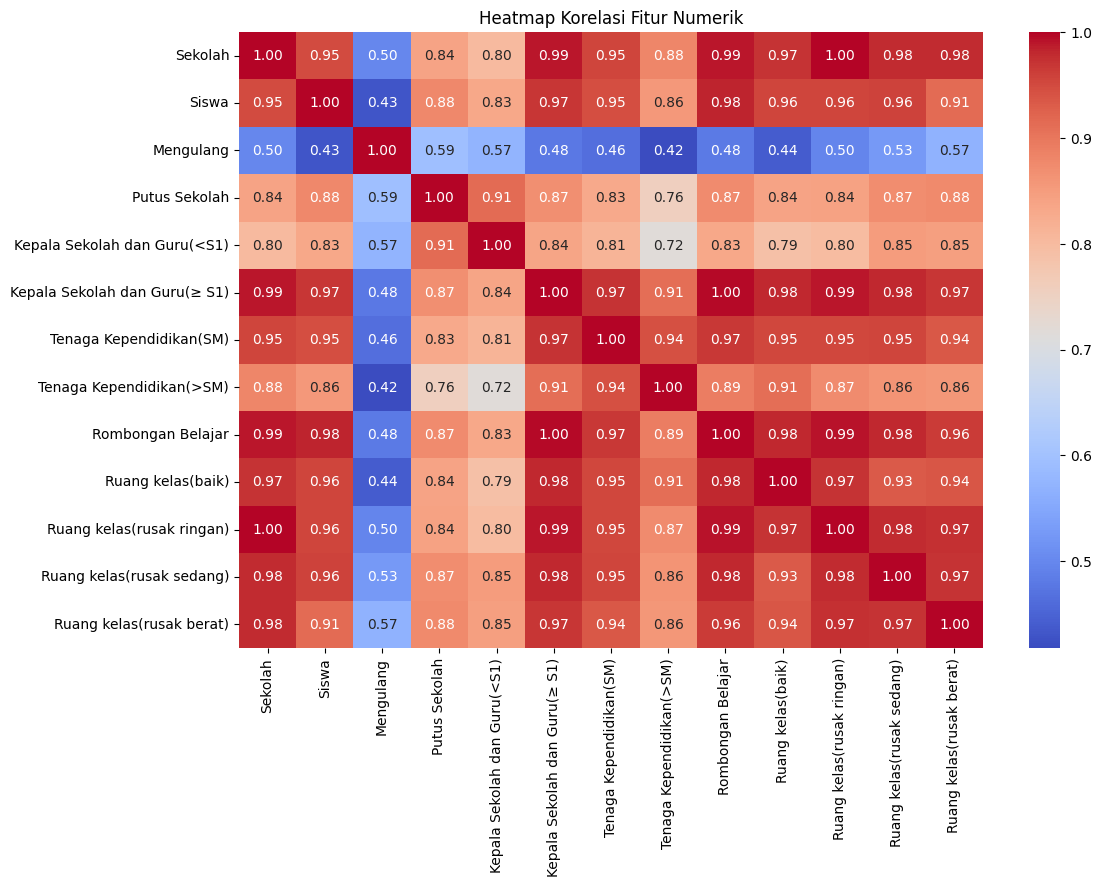

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [16]:
df_processed = df.copy()

## 5.1. Pembuatan Kolom Baru


Ini adalah tahap inti di mana kita akan membersihkan dan mengubah data mentah menjadi format yang siap untuk pemodelan. Proses ini mencakup:
1.  **Pembuatan Kolom Target**: Membuat kolom `Status_Kelayakan` dari rasio guru berkualitas.
2.  **Encoding**: Mengubah data kategorikal (Provinsi dan Target) menjadi format numerik.
3.  **Standarisasi**: Menyamakan skala semua fitur numerik.

In [17]:
print("Memulai proses pembuatan kolom target...")

total_guru = df_processed['Kepala Sekolah dan Guru(<S1)'] + df_processed['Kepala Sekolah dan Guru(≥ S1)'] + 1e-6
df_processed['Rasio_Guru_Layak'] = df_processed['Kepala Sekolah dan Guru(≥ S1)'] / total_guru
print("Kolom 'Rasio_Guru_Layak' berhasil dibuat.")

threshold = df_processed['Rasio_Guru_Layak'].median()
print(f"Ambang batas (median) untuk Rasio Guru Layak: {threshold:.2f}")

df_processed['Status_Kelayakan'] = np.where(df_processed['Rasio_Guru_Layak'] >= threshold, 'Layak', 'Tidak Layak')
TARGET_COLUMN = 'Status_Kelayakan'
print(f"Kolom target '{TARGET_COLUMN}' berhasil dibuat.")

Memulai proses pembuatan kolom target...
Kolom 'Rasio_Guru_Layak' berhasil dibuat.
Ambang batas (median) untuk Rasio Guru Layak: 0.96
Kolom target 'Status_Kelayakan' berhasil dibuat.


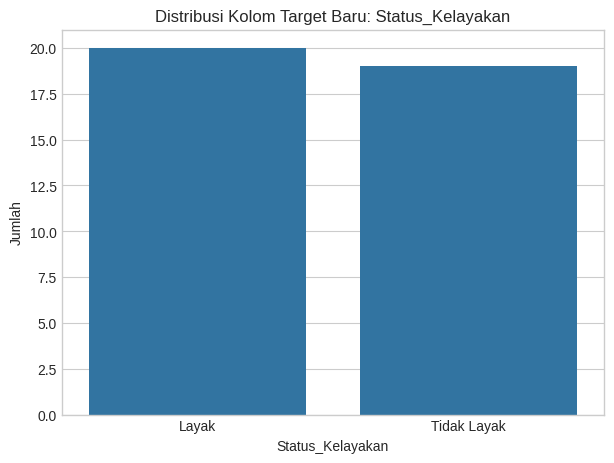

In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df_processed, x=TARGET_COLUMN)
plt.title(f'Distribusi Kolom Target Baru: {TARGET_COLUMN}')
plt.ylabel('Jumlah')
plt.show()

In [19]:
df_processed.drop(columns=['Rasio_Guru_Layak'], inplace=True)
print("Kolom 'Rasio_Guru_Layak' telah dihapus.")
print("\n" + "="*80 + "\n")

Kolom 'Rasio_Guru_Layak' telah dihapus.




## 5.2. Preprocessing Lanjutan (Encoding & Standarisasi)

In [20]:
print("Memulai Preprocessing Lanjutan...")
print("-> Melakukan Encoding...")

le = LabelEncoder()
df_processed[TARGET_COLUMN] = le.fit_transform(df_processed[TARGET_COLUMN])
print(f"Kolom target '{TARGET_COLUMN}' telah di-encode.")

df_processed = pd.get_dummies(df_processed, columns=['Provinsi'], drop_first=True)
print("Fitur 'Provinsi' telah di-encode.")
print("\n-> Melakukan Standarisasi...")

features_to_scale = [col for col in df_processed.select_dtypes(include=np.number).columns if col != TARGET_COLUMN]
scaler = StandardScaler()
df_processed[features_to_scale] = scaler.fit_transform(df_processed[features_to_scale])
print("Semua fitur numerik telah distandarisasi.")

Memulai Preprocessing Lanjutan...
-> Melakukan Encoding...
Kolom target 'Status_Kelayakan' telah di-encode.
Fitur 'Provinsi' telah di-encode.

-> Melakukan Standarisasi...
Semua fitur numerik telah distandarisasi.


In [22]:
df_processed.head()

,Sekolah,Siswa,Mengulang,Putus Sekolah,Kepala Sekolah dan Guru(<S1),Kepala Sekolah dan Guru(≥ S1),Tenaga Kependidikan(SM),Tenaga Kependidikan(>SM),Rombongan Belajar,Ruang kelas(baik),Ruang kelas(rusak ringan),Ruang kelas(rusak sedang),Ruang kelas(rusak berat),Status_Kelayakan,Provinsi_Prov. Aceh,Provinsi_Prov. Bali,Provinsi_Prov. Banten,Provinsi_Prov. Bengkulu,Provinsi_Prov. D.I. Yogyakarta,Provinsi_Prov. D.K.I. Jakarta,Provinsi_Prov. Gorontalo,Provinsi_Prov. Jambi,Provinsi_Prov. Jawa Barat,Provinsi_Prov. Jawa Tengah,Provinsi_Prov. Jawa Timur,Provinsi_Prov. Kalimantan Barat,Provinsi_Prov. Kalimantan Selatan,Provinsi_Prov. Kalimantan Tengah,Provinsi_Prov. Kalimantan Timur,Provinsi_Prov. Kalimantan Utara,Provinsi_Prov. Kepulauan Bangka Belitung,Provinsi_Prov. Kepulauan Riau,Provinsi_Prov. Lampung,Provinsi_Prov. Maluku,Provinsi_Prov. Maluku Utara,Provinsi_Prov. Nusa Tenggara Barat,Provinsi_Prov. Nusa Tenggara Timur,Provinsi_Prov. Papua,Provinsi_Prov. Papua Barat,Provinsi_Prov. Papua Barat Daya,Provinsi_Prov. Papua Pegunungan,Provinsi_Prov. Papua Selatan,Provinsi_Prov. Papua Tengah,Provinsi_Prov. Riau,Provinsi_Prov. Sulawesi Barat,Provinsi_Prov. Sulawesi Selatan,Provinsi_Prov. Sulawesi Tengah,Provinsi_Prov. Sulawesi Tenggara,Provinsi_Prov. Sulawesi Utara,Provinsi_Prov. Sumatera Barat,Provinsi_Prov. Sumatera Selatan,Provinsi_Prov. Sumatera Utara
0,-0.331971,0.163269,-0.717967,-0.248155,-0.222164,-0.040724,0.197258,0.718280,-0.040494,0.775155,-0.393455,-0.730349,-0.744358,0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,3.278182,4.532546,0.848678,3.921150,3.682491,3.535141,3.589580,2.655072,3.819924,3.266198,3.399797,3.835518,3.048356,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3.083394,2.316511,1.782270,1.079152,1.021585,2.662506,2.570892,1.699704,2.665178,2.679561,3.071085,2.737082,2.794645,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,-0.410720,-0.405721,-1.088162,-0.936967,-0.982565,-0.428418,-0.204630,-0.044929,-0.424457,-0.262071,-0.394176,-0.580027,-0.689567,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,3.158809,2.241323,0.811878,1.884211,1.632497,2.932976,2.536340,3.159897,2.868111,3.203496,3.119716,2.452283,3.046197,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##5.3. Menyimpan Data Terbaru

In [25]:
output_path = '/content/drive/MyDrive/Eksperimen_SML_Wahyu/preprocessing/Kelayakan-pendidikan-indonesia_preprocessing/data_bersih.csv'
output_dir = os.path.dirname(output_path)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Directory '{output_dir}' created.")

df_processed.to_csv(output_path, index=False)
print(f"\nData yang sudah bersih berhasil disimpan di: {output_path}")

Directory '/content/drive/MyDrive/Eksperimen_SML_Wahyu/preprocessing/Kelayakan-pendidikan-indonesia_preprocessing' created.

Data yang sudah bersih berhasil disimpan di: /content/drive/MyDrive/Eksperimen_SML_Wahyu/preprocessing/Kelayakan-pendidikan-indonesia_preprocessing/data_bersih.csv
